# Background genes plot

In [1]:
library(ggplot2)
library(magrittr)
library(gridExtra)

In [2]:
BC_curve=read.table("/fast/AG_Huebner/huebner3/ANALYSES/20200706_el_COVID_Biopsy/data_publication/BC_rank_table.csv", sep="\t", header=T)

In [3]:
tail(BC_curve)

,X,Sample,n_counts,count_rank,true_cell,Gene
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>
14819995,24959994,HCAHeart7964513_premrna,27,37225,False,control
14819996,24959995,HCAHeart7964513_premrna,3,94275,False,control
14819997,24959996,HCAHeart7964513_premrna,34,19971,False,control
14819998,24959997,HCAHeart7964513_premrna,27,37226,False,control
14819999,24959998,HCAHeart7964513_premrna,26,41051,False,control
14820000,24959999,HCAHeart7964513_premrna,27,37227,False,control


In [4]:
BC_curve$Gene <- gsub("control", "Explant", BC_curve$Gene)

In [5]:
BC_curve <- BC_curve[BC_curve$Gene %in% c("Biopsy", "Explant"),]

In [6]:
options(repr.plot.width=14, repr.plot.height=9)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation ideoms with `aes()`”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


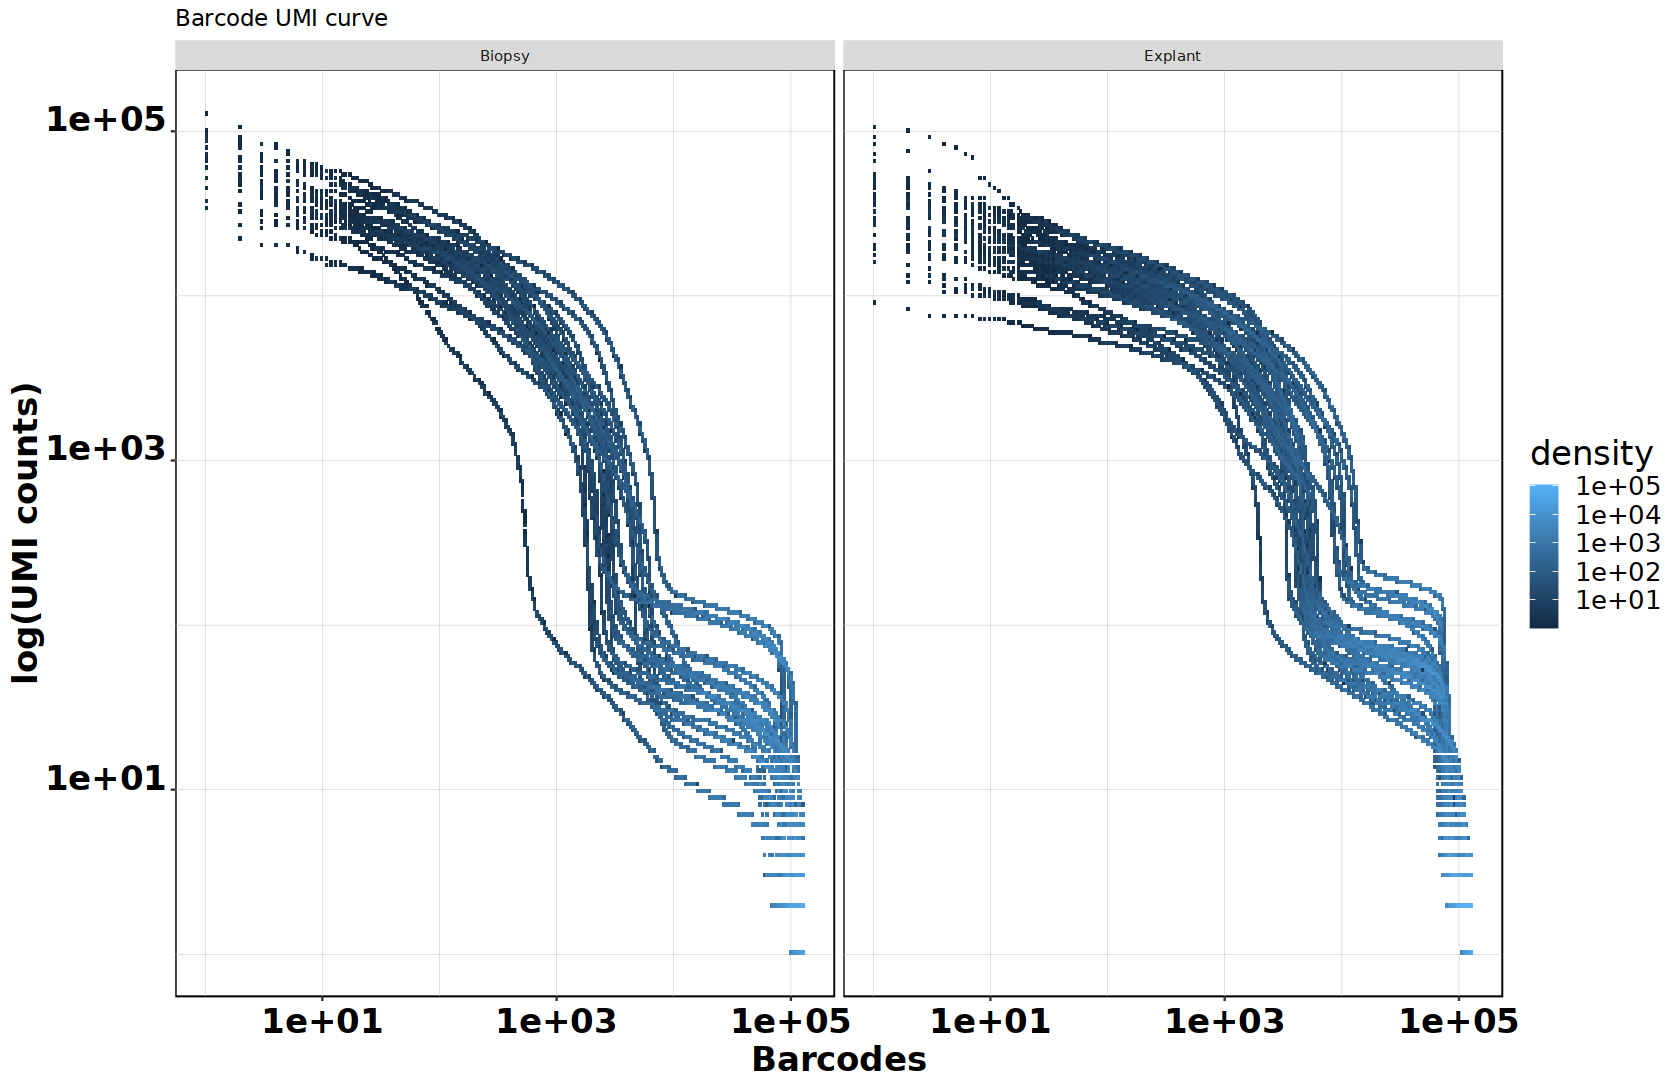

In [7]:
g <- ggplot(BC_curve, aes_string(x="count_rank", y="n_counts")) +
  scale_x_log10() + scale_y_log10() + 
  geom_bin2d(bins = 250) +
  scale_fill_gradient(name='density', trans = "log", breaks =c(10^(seq(from = 1, to = 7, by = 1)))) + 
  xlab("Barcodes") + ylab("log(UMI counts)") + ggtitle("Barcode UMI curve") + 
  theme(axis.text.x = element_text(color = "black", size = 20, angle = 0, hjust = .5, vjust = .5, face = "bold"),
        axis.text.y = element_text(color = "black", size = 20, angle = 0, hjust = 0, vjust = 0, face = "bold"),  
        axis.title.x = element_text(color = "black", size = 20, angle = 0, hjust = .5, vjust = 0, face = "bold"),
        axis.title.y = element_text(color = "black", size = 20, angle = 90, hjust = .5, vjust = .5, face = "bold"),
        legend.title=element_text(size=20),
        legend.text=element_text(size=15),
        panel.background = element_rect(fill = NA, color="black"),
        panel.grid.major = element_line(colour = "grey", size=0.1),
        panel.grid.minor = element_line(colour = "grey", size=0.1)
       ) + facet_grid(.~Gene)
g 

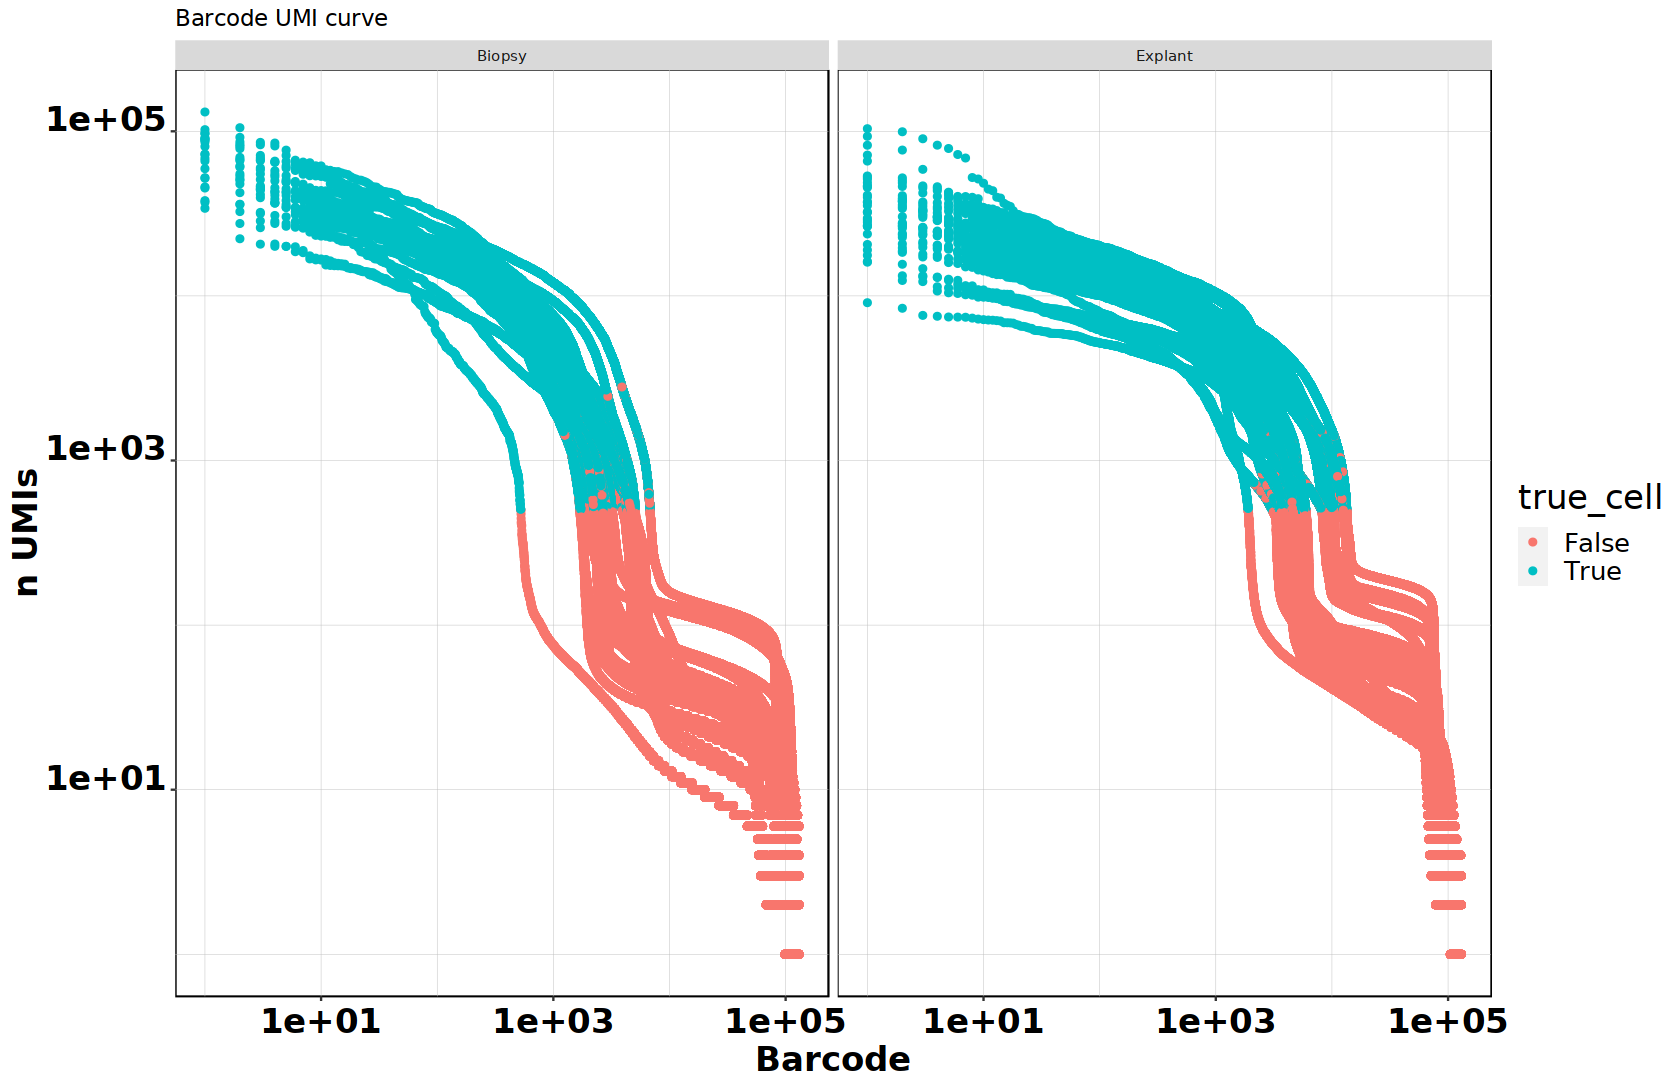

In [8]:
g2 <- ggplot(BC_curve, aes_string(x="count_rank", y="n_counts", color="true_cell")) +
  scale_x_log10() + scale_y_log10() + 
  geom_point() +
  #scale_fill_gradient(name='density', trans = "log", breaks =c(10^(seq(from = 1, to = 7, by = 1)))) + 
  xlab("Barcode") + ylab("n UMIs") + ggtitle("Barcode UMI curve") + 
  theme(axis.text.x = element_text(color = "black", size = 20, angle = 0, hjust = .5, vjust = .5, face = "bold"),
        axis.text.y = element_text(color = "black", size = 20, angle = 0, hjust = 0, vjust = 0, face = "bold"),  
        axis.title.x = element_text(color = "black", size = 20, angle = 0, hjust = .5, vjust = 0, face = "bold"),
        axis.title.y = element_text(color = "black", size = 20, angle = 90, hjust = .5, vjust = .5, face = "bold"),
        legend.title=element_text(size=20),
        legend.text=element_text(size=15),
        panel.background = element_rect(fill = NA, color="black"),
        panel.grid.major = element_line(colour = "grey", size=0.1),
        panel.grid.minor = element_line(colour = "grey", size=0.1)
       )  + facet_grid(.~Gene)
g2

In [12]:
?pdf

In [13]:
pdf("/fast/AG_Huebner/huebner3/ANALYSES/20200706_el_COVID_Biopsy/data_publication/BC_UMI_plot.pdf", width = 12, height = 7)
g
dev.off()

png 
  2

In [14]:
pdf("/fast/AG_Huebner/huebner3/ANALYSES/20200706_el_COVID_Biopsy/data_publication/BC_UMI_plot_cells.pdf", width = 12, height = 7)
g2
dev.off()

png 
  2